# Homework 22

Section 12.2

Math 404

Winter 2020

In [1]:
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

## Exercise 12.5
Use ``sklearn.datasets import make_circles`` to generate a nonconvex clustered dataset. 

In [2]:
X, label = make_circles(n_samples=500, noise=0.1, factor=.2)

### Part (i)
Scatterplot the data $X$ and color each label by its point.

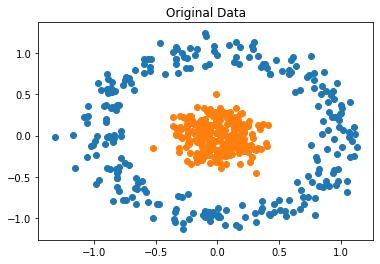

In [3]:
def part1(X, label, ax):
    for l in np.unique(label):
        mask = label == l
        ax.scatter(X[mask, 0], X[mask, 1])

part1(X, label, plt.gca())
plt.title("Original Data")
plt.show()

### Part (ii)
Run K-means with $K=2$ on the data and scatterplot the results (color by cluster from K-means).

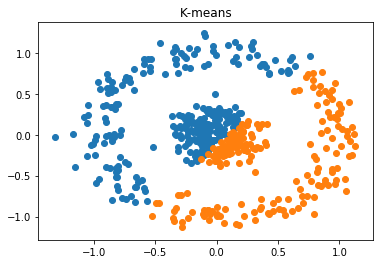

In [4]:
kmeans_label = KMeans(n_clusters=2).fit_predict(X)
part1(X, kmeans_label, plt.gca())
plt.title("K-means")
plt.show()

### Part (iii)
Use ``sklearn.neighbors import kneighbors_graph`` with 5 nearest neighbors to create an adjacency matrix for $X$. 

In [5]:
unsym = kneighbors_graph(X, n_neighbors=5)
A = unsym + unsym.T - unsym.multiply(unsym.T) #Equation 12.4.  Csr matrices broadcast * to matrix multiplication :(

### Part (iv)
Create the graph Laplacian $L=D-A$.

In [6]:
#Need to be aware of the fact that A is a csr matrix.
D_flat = (A.sum(axis=1))
D_flat = np.array(D_flat).ravel() #For some reason A.sum() returns a numpy.matrix object.  Dumb.
D_sparse = sparse.diags([D_flat], [0])
L = D_sparse - A

### Part (v)
Find the eigenvalues of $L$ and use this to identify how many connected components there are in the graph.

In [7]:
#Sparse's eigenvectors routine is really frustrating.  It finds largest eigenvectors, not smallest.
num_evecs = 6 #Number of eigenvectors to compute
evalsL, evecsL = sparse.linalg.eigsh(L, k=num_evecs, sigma=0)
n_connected_components = sum(np.isclose(0, evalsL)) #Theorem 12.2.3 part (iv)
print("There are", n_connected_components, "connected components.")

There are 2 connected components.


### Part (vi)
Find the eigenvalues and eigenvectors $D^{-1/2}LD^{-1/2}$ and sort the eigenvalues and eigenvectors by size of the eigenvalue.

In [8]:
D_inv_sqrt = sparse.diags([1/np.sqrt(D_flat)], [0])
#DinvsqrtLDinvsqrt = D_inv_sqrt * L * D_inv_sqrt
ImDinvsqrtADinvsqrt = sparse.diags([np.ones_like(D_flat)], [0]) - D_inv_sqrt * A * D_inv_sqrt
#evals, evecs = sparse.linalg.eigsh(DinvsqrtLDinvsqrt, k=2, sigma=0)
evals, evecs = sparse.linalg.eigsh(ImDinvsqrtADinvsqrt, k=2, sigma=0)
evecs = evecs[:, evals.argsort()]
evals.sort()

### Part (vii)
Create two sets $J^{-}$ and $J^{+}$ and use these to label two clusters in the data.

In [9]:
evec2 = np.array(evecs[:,1]).ravel()
spectral_label = evec2 > 0
Jp = X[evec2 > 0]
Jn = X[evec2 <= 0]

### Part (viii)
Plot the data and color each point by the cluster it has been assigned.
Compare the results to the original plot and the K-means plot.

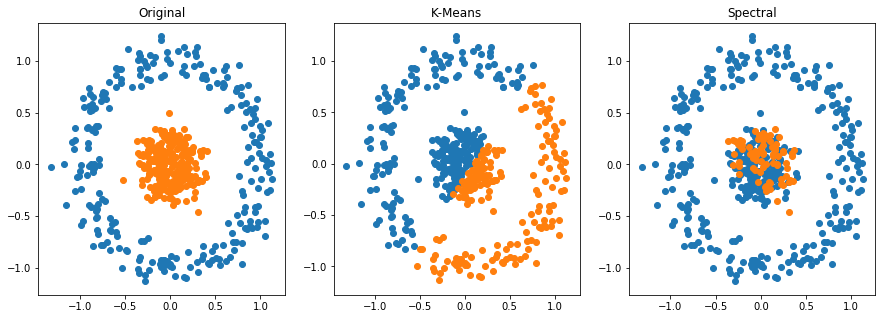

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.ravel()
labelings = [label, kmeans_label, spectral_label]
titles = ['Original', 'K-Means', 'Spectral']
for ax, labeling, title in zip(axes, labelings, titles):
    part1(X, labeling, ax)
    ax.set_title(title)
plt.show()

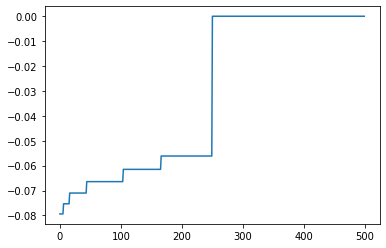

In [11]:
evec2_mutilated = evec2.copy()
evec2_mutilated.sort()
plt.plot(evec2_mutilated)

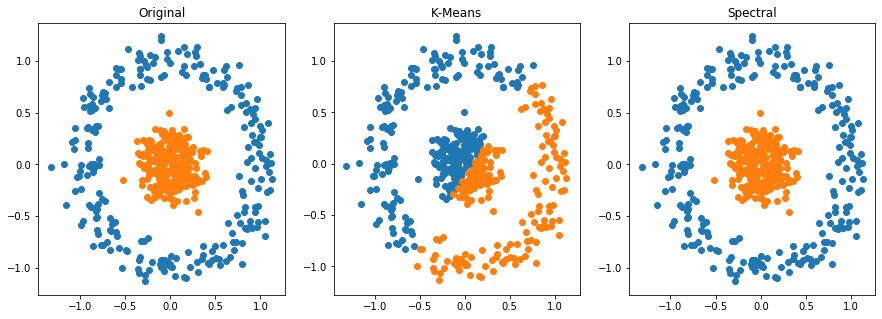

In [12]:
#Try cutting at -0.03 instead.
spectral_label = evec2 > -0.03
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.ravel()
labelings = [label, kmeans_label, spectral_label]
titles = ['Original', 'K-Means', 'Spectral']
for ax, labeling, title in zip(axes, labelings, titles):
    part1(X, labeling, ax)
    ax.set_title(title)
plt.show()

In [15]:
print(sum(np.isclose(0, evec2)))

250


In [19]:
#Well... cutting at 0 seems really bad in this case.  Not sure what's up.
print(sum(np.isclose(0, evec2) & (evec2 < 0)))

164
